<a href="https://colab.research.google.com/github/melliaafs/Machine-Learning-1/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [289]:
# Import dataset
# Sesuaikan dengan lokasi file xclara.csv di local komputer
data = pd.read_csv('xclara.csv')

In [290]:
print(data.shape)

(3000, 2)


In [291]:
print(data.head(20))

           V1         V2
0    2.072345  -3.241693
1   17.936710  15.784810
2    1.083576   7.319176
3   11.120670  14.406780
4   23.711550   2.557729
5   24.169930  32.024780
6   21.665780   4.892855
7    4.693684  12.342170
8   19.211910  -1.121366
9    4.230391  -4.441536
10   9.127130  23.605720
11   0.407503  15.297050
12   7.314846   3.309312
13  -3.438403 -12.025270
14  17.639350  -3.212345
15   4.415292  22.815550
16  11.941220   8.122487
17   0.725853   1.806819
18   8.185273  28.132600
19  -5.773587   1.024800


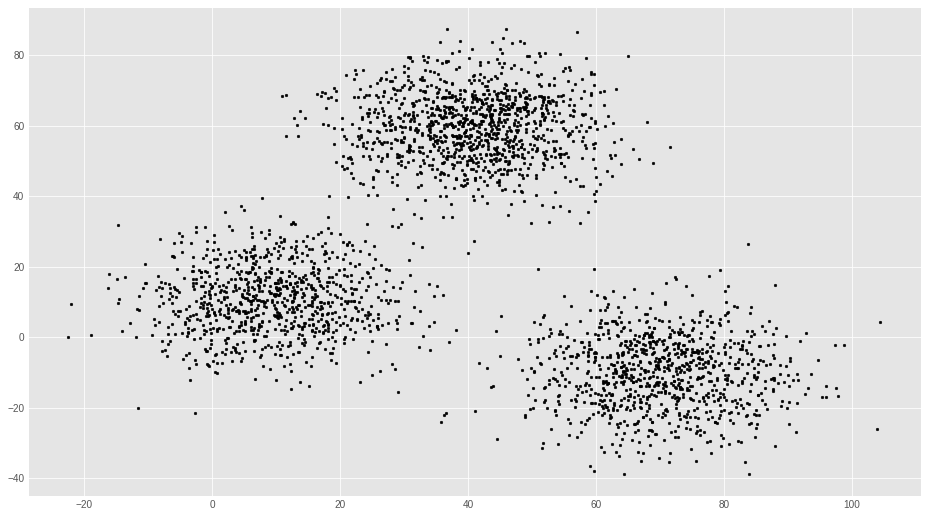

In [292]:
# Plot dataset
f1 = data['V1'].values
f2 = data['V2'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c='black', s=7)

In [293]:
from sklearn.cluster import KMeans
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# Fitting input data
kmeans = kmeans.fit(X)
# Mendapatkan cluster labels

labels = kmeans.predict(X)

# Mendapatkan nilai centroid
C = kmeans.cluster_centers_

# Mencetak nilai centroid

print(C)

[[  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]]


In [294]:
print(labels)

[0 0 0 ... 1 1 1]


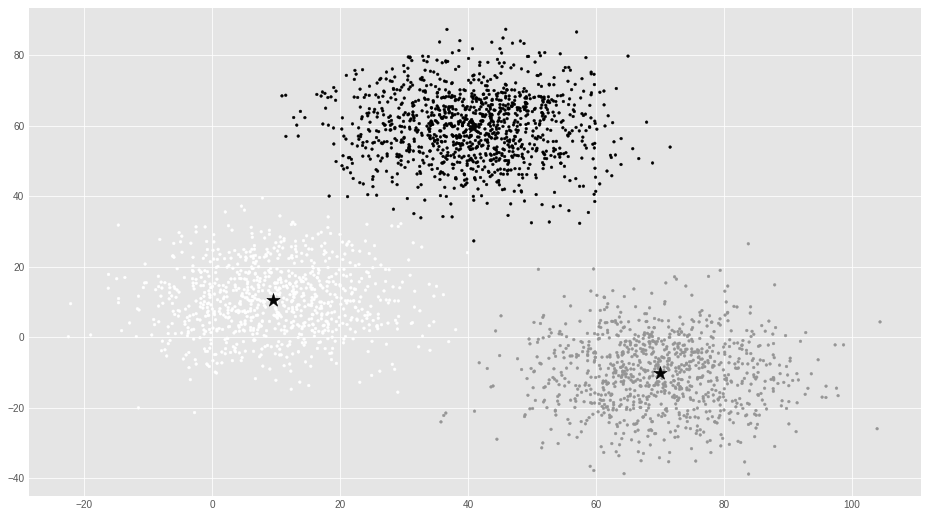

In [295]:
plt.scatter(X[:, 0], X[:, 1], s=7, c=labels)
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

**Melakukan Clustering Menggunakan Generate Dataset**

***soal no 1***

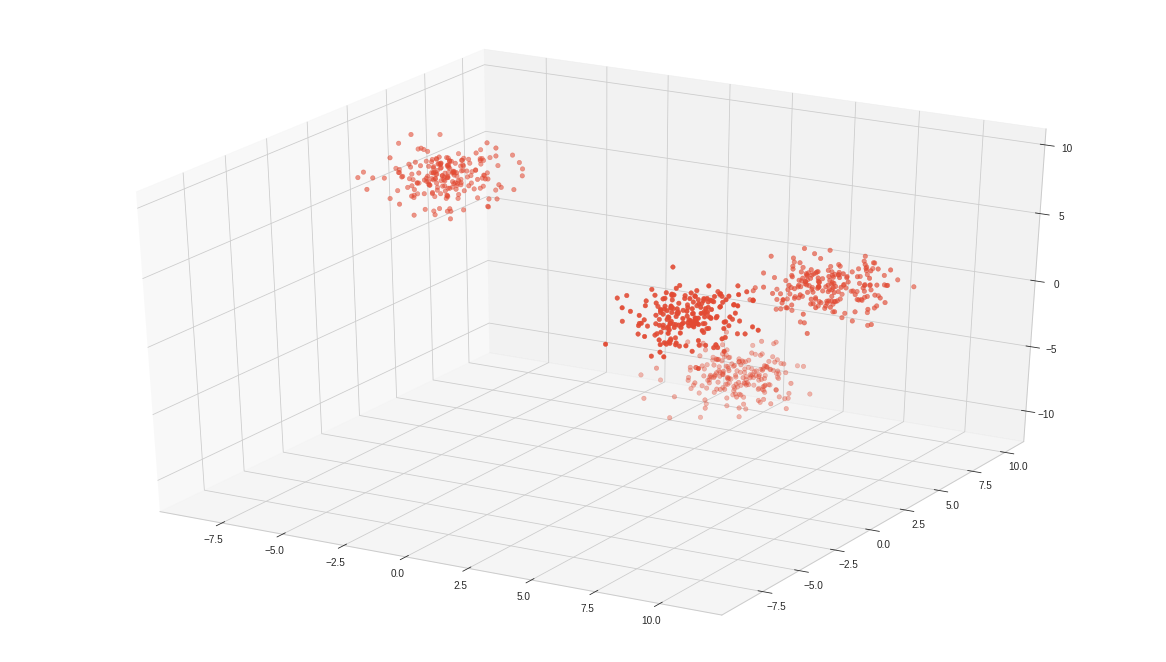

In [326]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = (16, 9)

# Men-generate dataset yang terkelompok dalam 4 cluster
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

**Melakukan clustering**

In [297]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

**Plot hasil clustering**

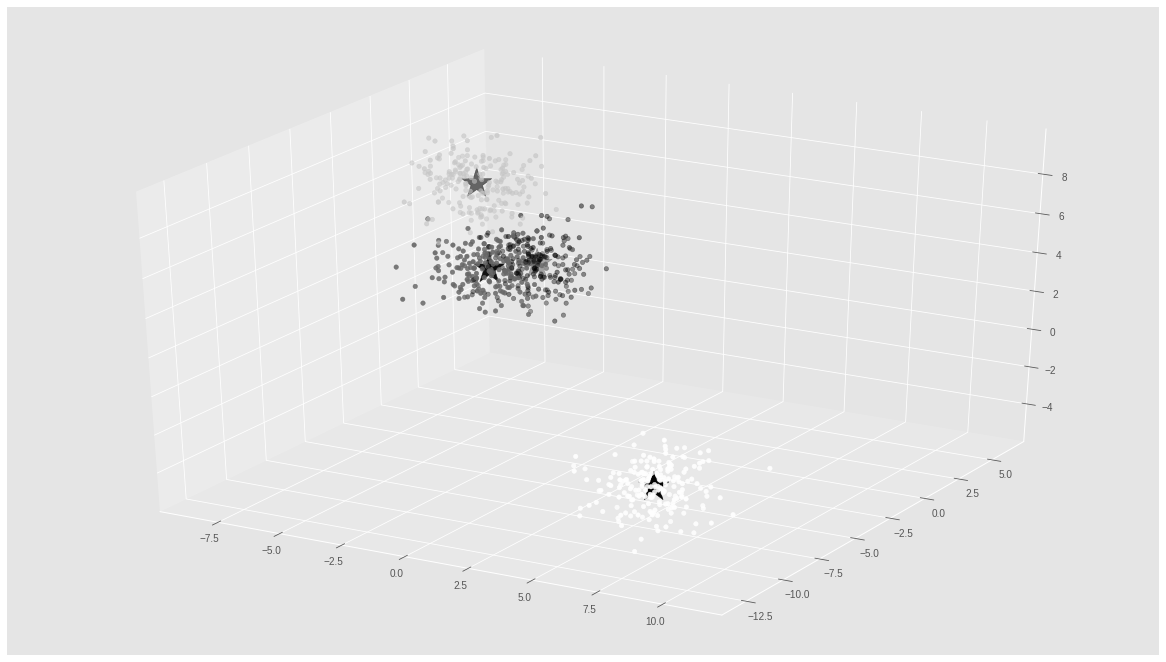

In [298]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

**Melakukan Evaluasi Hasil Clustering**

***soal no 3***

In [299]:
for k in range (1, 10):
    # Menentukan jumlah cluster
  kmeans = KMeans(n_clusters=k, random_state=1)
  # Fitting input data
  kmeans = kmeans.fit(X)
  # Mendapatkan cluster l(abels
  labels = kmeans.predict(X)
  # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
  interia = kmeans.inertia_
  print( "k:",k, " cost:", interia)
print ("")

k: 1  cost: 58460.21136920679
k: 2  cost: 19202.087111174696
k: 3  cost: 6074.126232958974
k: 4  cost: 2360.225930027204
k: 5  cost: 2187.7273310783576
k: 6  cost: 2042.4067156203782
k: 7  cost: 1900.2566199342273
k: 8  cost: 1787.1874281192277
k: 9  cost: 1662.389442992094



Evaluasi hasil cluster menggunakan silhouette coefficient

In [300]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)

0.2465975451605972

**Issue dalam K-Means Clustering**

Elbow Method

Importing library

In [301]:
%matplotlib inline
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend
import matplotlib.pyplot as plt
#Matplotlib is a plotting library for the Python programming language and its numericalmathematics extension NumPy
plt.style.use('seaborn-whitegrid')
#Seaborn style on matplotlib plot, menentukan jenis graph. untuk jenis graph lain bisa
#https://python-graph-gallery.com/199-matplotlib-style-sheets/
import numpy as np
from sklearn.cluster import KMeans

**Data**

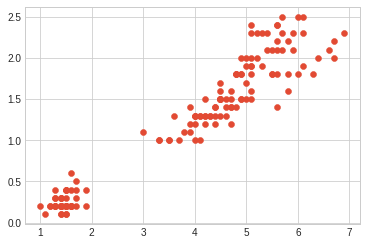

In [302]:
# membuat data set
from sklearn.datasets import load_iris
iris = load_iris()
features=iris.data.T
#mengambil data dari fitur data iris.
plt.plot()
plt.scatter(features[2], features[3]) #2 fitur yang akan dipakai
plt.show()
#catatan: jika ingin mencetak/mmengetahui data iris, di baris palingbawah bisa diketik iris. (atau iris.data , atau iris.target_names)

Menentukan nilai yang tepat untuk cluster

In [303]:
#mencetak data iris
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [304]:
#mengetahui label dalam data iris
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [305]:
print(features[1])

[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8 3.3 2.7 3.  2.9 3.  3.  2.5 2.9
 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2
 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.  3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2
 3.3 3.  2.5 3.  3.4 3. ]


In [306]:
print(features[2])

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]


In [307]:
X = np.array(list(zip(features[0], features[1]))).reshape(len(features[1]),2)
SSE = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(X)
  kmeanModel.fit(X)
  SSE.append(kmeanModel.inertia_)

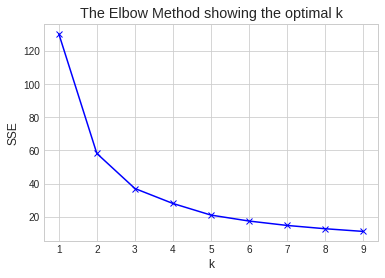

In [308]:
#plot the elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Menentukan nilai K berdasar elbow graph tersebut.

***soal no 2***

Text(0.5, 1.0, 'K=2')

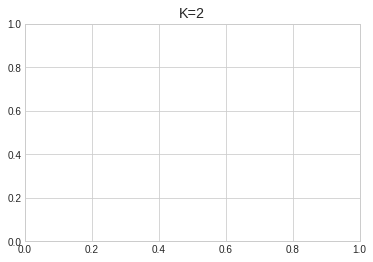

In [322]:
y_pred = KMeans(n_clusters=2).fit_predict(X)
plt.plot

LABEL_COLOR_MAP ={0 : 'r',
                  1 : 'g',
                  2 : 'b'
                  }
label_color = [LABEL_COLOR_MAP[1] for 1 in y_pred]
plt.scatter(features[1], features[2], c=label_color)
plt.title("K=2")
plt.show()

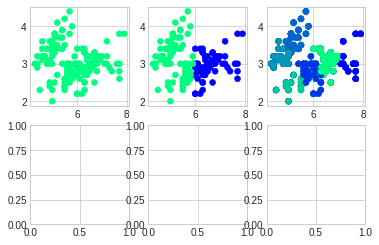

In [321]:
figure,ax=plt.subplots(2,3)
K=range(1,7)
for k in K:
  if(k<4):
    row=0
    column=k-1
  kmeanModel = KMeans(n_clusters=k).fit(X)
  y_pred = kmeanModel.fit_predict(X)
  ax[row][column].scatter(features[0],features[1], c=y_pred,cmap='winter_r')

plt.show()
